In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [47]:
import pandas as pd
import numpy as np

In [48]:
df=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

In [49]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [54]:

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


In [36]:
print(df['Destination'].head)

<bound method NDFrame.head of 0         TRAPPIST-1e
1         TRAPPIST-1e
2         TRAPPIST-1e
3         TRAPPIST-1e
4         TRAPPIST-1e
            ...      
8688      55 Cancri e
8689    PSO J318.5-22
8690      TRAPPIST-1e
8691      55 Cancri e
8692      TRAPPIST-1e
Name: Destination, Length: 8693, dtype: object>


# Null Analysis and Visualization with Plotly

In [65]:
def null_analysis(df):
  null_cnt = df.isnull().sum() # calculate null counts
  null_cnt = null_cnt[null_cnt!=0] # remove non-null cols
  null_percent = null_cnt / len(df) * 100 # calculate null percentages
  null_table = pd.concat([pd.DataFrame(null_cnt), pd.DataFrame(null_percent)], axis=1)
  null_table.columns = ['counts', 'percentage']
  null_table.sort_values('counts', ascending=False, inplace=True)
  return null_table

# visualise null table
import plotly_express as px
null_table = null_analysis(df)
print(null_table)
px.bar(null_table.reset_index(), x='index', y='percentage', text='counts', height=500)

              counts  percentage
ShoppingMall     208    2.392730
VRDeck           188    2.162660
FoodCourt        183    2.105142
Spa              183    2.105142
RoomService      181    2.082135
Age              179    2.059128


In [66]:
df.dropna(inplace=True)


In [67]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 7620 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7620 non-null   int64  
 1   HomePlanet    7620 non-null   int64  
 2   CryoSleep     7620 non-null   int64  
 3   Cabin         7620 non-null   int64  
 4   Destination   7620 non-null   int64  
 5   Age           7620 non-null   float64
 6   VIP           7620 non-null   int64  
 7   RoomService   7620 non-null   float64
 8   FoodCourt     7620 non-null   float64
 9   ShoppingMall  7620 non-null   float64
 10  Spa           7620 non-null   float64
 11  VRDeck        7620 non-null   float64
 12  Name          7620 non-null   int64  
 13  Transported   7620 non-null   bool   
dtypes: bool(1), float64(6), int64(7)
memory usage: 840.9 KB
None

Basic Statistics:
       PassengerId   HomePlanet    CryoSleep        Cabin  Destination  \
count  7620.000000  7620.00000

In [58]:
from sklearn.preprocessing import LabelEncoder


In [68]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

print(df)

      PassengerId  HomePlanet  CryoSleep  Cabin  Destination   Age  VIP  \
0               0           1          0    149            2  39.0    0   
1               1           0          0   2184            2  24.0    0   
2               2           1          0      1            2  58.0    1   
3               3           1          0      1            2  33.0    0   
4               4           0          0   2186            2  16.0    0   
...           ...         ...        ...    ...          ...   ...  ...   
8688         8688           1          0    146            0  41.0    1   
8689         8689           0          1   5280            1  18.0    0   
8690         8690           0          0   5285            2  26.0    0   
8691         8691           1          0   2131            0  32.0    0   
8692         8692           1          0   2131            2  44.0    0   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Name  Transported  
0             0.0  

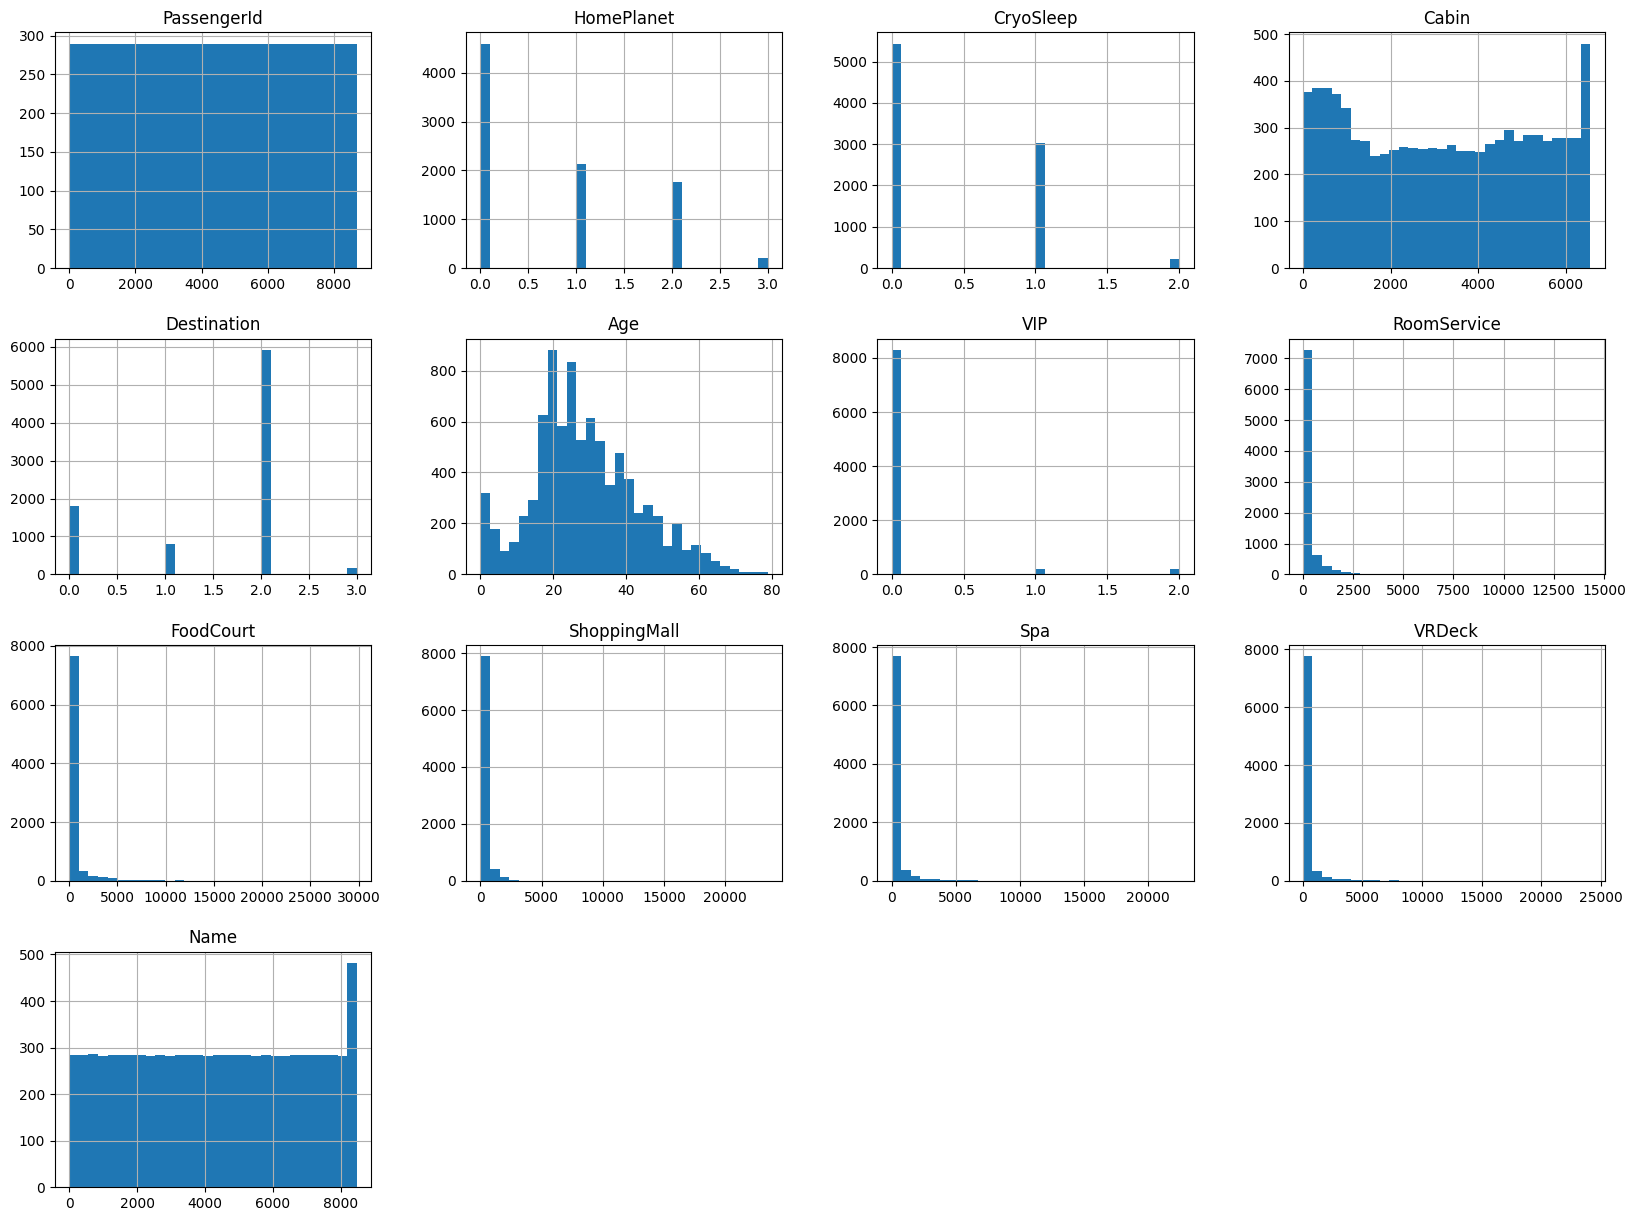

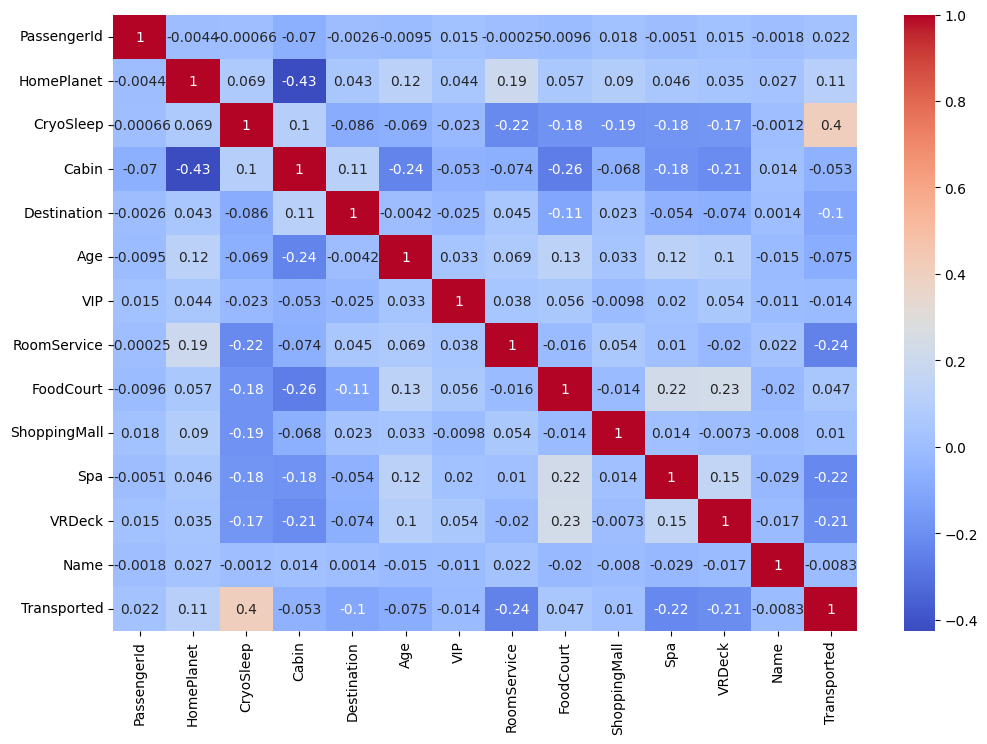

In [60]:

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Visualize the distribution of numerical features
df.hist(bins=30, figsize=(20, 15))
plt.show()

# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [69]:


def boxplot_outlier_removal(X, exclude=['']):
    before = len(X)
    for col in X.columns:
        if col not in exclude:
            # get Q1, Q3 & Interquantile Range
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            IQR = Q3 - Q1
            # define outliers and remove them
            filter_ = (X[col] > Q1 - 1.5 * IQR) & (X[col] < Q3 + 1.5 *IQR)
            X = X[filter_]

    after = len(X)
    diff = before-after
    percent = diff/before*100
    print('{} ({:.2f}%) outliers removed'.format(diff, percent))
    return X


In [70]:
boxplot_outlier_removal(df)

7620 (100.00%) outliers removed


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


In [71]:
from sklearn.feature_selection import chi2


In [72]:
# Separate features and target variable
X = df.drop(columns=['Transported'])
y = df['Transported']

# Apply Chi-Square test
chi2_scores, p_values = chi2(X, y)

# Create a DataFrame with the results
chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_scores,
    'P-value': p_values
})

print(chi2_results.sort_values(by='Chi2 Score', ascending=False))

         Feature    Chi2 Score        P-value
10           Spa  1.572655e+06   0.000000e+00
11        VRDeck  1.346371e+06   0.000000e+00
7    RoomService  9.092502e+05   0.000000e+00
8      FoodCourt  1.141684e+05   0.000000e+00
3          Cabin  2.357190e+04   0.000000e+00
0    PassengerId  3.674640e+03   0.000000e+00
9   ShoppingMall  1.144019e+03  8.949830e-251
2      CryoSleep  8.931831e+02  2.976778e-196
12          Name  7.714697e+02  8.613816e-170
5            Age  3.250800e+02   1.133415e-72
1     HomePlanet  7.976899e+01   4.208467e-19
4    Destination  4.756913e+01   5.309795e-12
6            VIP  2.524187e+00   1.121125e-01


In [73]:
import pandas as pd

correlation_matrix = df.corr()
target_correlation = correlation_matrix['Transported']
sorted_correlation = target_correlation.abs().sort_values(ascending=False)
print(sorted_correlation)


Transported     1.000000
CryoSleep       0.399631
RoomService     0.243335
Spa             0.221511
VRDeck          0.207000
Destination     0.115493
HomePlanet      0.100568
Age             0.076536
FoodCourt       0.051097
Cabin           0.049366
PassengerId     0.018273
VIP             0.014387
Name            0.008362
ShoppingMall    0.008356
Name: Transported, dtype: float64


In [74]:
columns_to_drop = df.columns[[0,8,9,12]]

# Dropping the specified columns
df = df.drop(columns=columns_to_drop)


# Feature Selection and Model Evaluation with Logistic Regression and Recursive Feature Elimination (RFE)



In [75]:

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize the model (Logistic Regression in this case)
model = LogisticRegression(max_iter=10000)
# Initialize RFE with the model and the number of features to select
n_features_to_select = 10  # Adjust this to the number of features you want
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)

# Fit RFE
rfe.fit(X_train, y_train)

# Get the ranking of the features and the support (selected features)
ranking = rfe.ranking_
selected_features = X_train.columns[rfe.support_]

print("Selected features:")
print(selected_features)

print("\nFeature rankings:")
for feature, rank in zip(X_train.columns, ranking):
    print(f"{feature}: {rank}")

# Transform the training and testing sets to only include selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Fit the model on the reduced set of features
model.fit(X_train_rfe, y_train)

# Evaluate the model
score = model.score(X_test_rfe, y_test)
print(f"\nModel accuracy with selected features: {score:.4f}")


Selected features:
Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')

Feature rankings:
PassengerId: 3
HomePlanet: 1
CryoSleep: 1
Cabin: 2
Destination: 1
Age: 1
VIP: 1
RoomService: 1
FoodCourt: 1
ShoppingMall: 1
Spa: 1
VRDeck: 1
Name: 4

Model accuracy with selected features: 0.7830


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score

X = df.drop(columns=['Transported'])
y = df['Transported']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Create an XGBoost classifier
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train_normalized, y_train)

# Predict on the test set
y_pred = model.predict(X_test_normalized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoost Model Accuracy: {accuracy:.4f}')


XGBoost Model Accuracy: 0.7979


In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

In [79]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Model Accuracy: 0.7979
Confusion Matrix:
[[606 152]
 [156 610]]
Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.80      0.80       758
        True       0.80      0.80      0.80       766

    accuracy                           0.80      1524
   macro avg       0.80      0.80      0.80      1524
weighted avg       0.80      0.80      0.80      1524



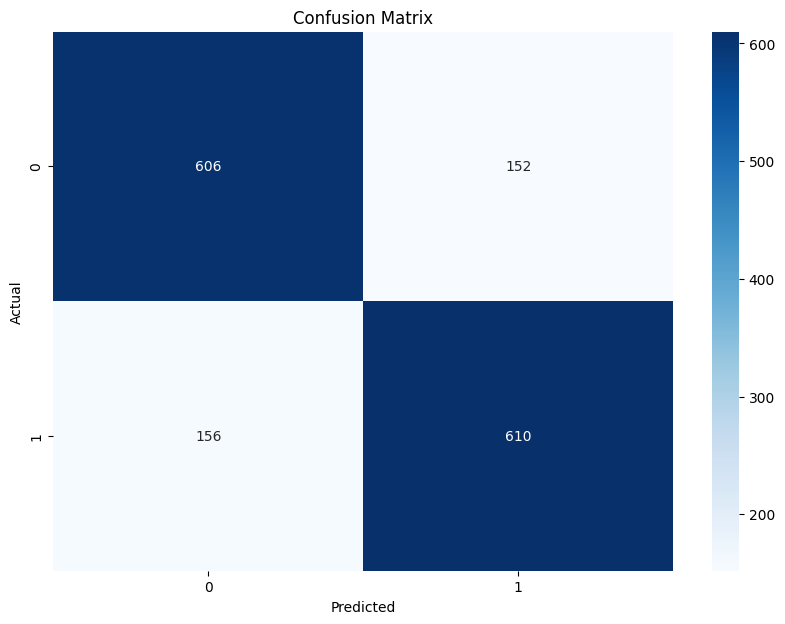

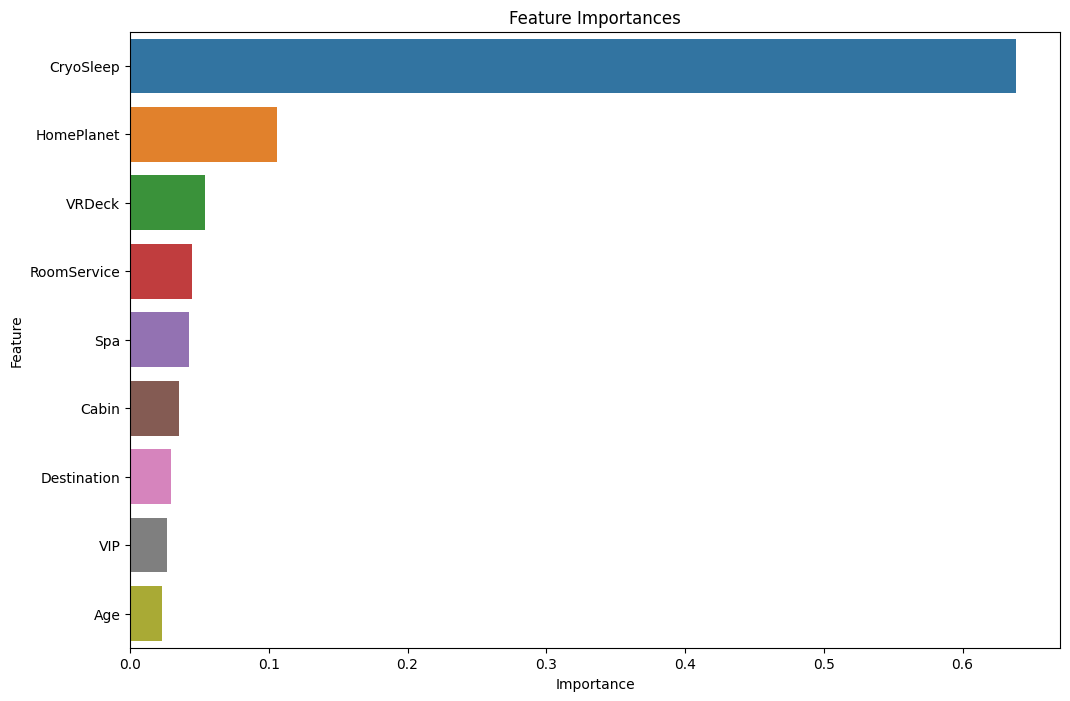

In [80]:
# Confusion Matrix Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

# Interactive Feature Importance with Plotly
fig = px.bar(importance_df, x='Importance', y='Feature', orientation='h', title='Feature Importances')
fig.show()


In [81]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 7))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

NameError: name 'precision_recall_curve' is not defined